image の部分図を表示する

In [2]:
DATA_DIR = 'Z:/knbnk/data'
Default_Param = {
    "param": {
        "arcdir":      DATA_DIR,
        "topdir":      DATA_DIR
    },
    "book": {
        "height":       600,
        "width":        400,
        "pages_in_koma": 2,
        "dan":          1,
        "vorh":         "vert",
        "morc":         "mono",
        "keisen":       "no",
        "waku":         "yes"
    },
    "koma": {
        "scale_size":   [320.0, 640.0],
        "binarize":     ["canny"],
        "feature":      ["hough"],
        "hough":        [[1, 2, 100]],
        "canny":        [[50, 150, 3], [100, 200, 3]],
    },
    "page": {
        "pagedir":      "/".join(['can_50_200_3', 'hgh_1_2_100', 'right']),
        "lr":           "right",
        "mavstd":       10,
        "pgmgn":        [0.05, 0.05],
        "ismgn":        [15, 5],
        "toobig":       [200, 200],
        "boundingRect": [16, 32],
        "mode":         "EXTERNAL",
        "method":       "NONE",
        "canny":        [50, 200, 3]
    }
}

In [3]:
import copy
import classes.knutil as ku
param_dict = copy.deepcopy(Default_Param)
spec = {
        "param": {
            "logfilename": "adj_check",
            "outdir":      "/".join([DATA_DIR, "1062973"]),
            "paramfdir":   "1062973",
            "paramfname":  "knp.json",
            "balls":       ["1062973"]
        },
        "book": {
            "bookdir":      '1062973',
            "bookId":       "1062973"
        },
        "koma": {
            "komadir":      'k009',
            "komaId":       9,
            "komaIdStr":    "009",
            "imgfname":     "009.jpeg"
        },
        "page": {
            "imgfname":     "009_0.jpeg",
            "pagedir":      "00"
        }
    }
for k, v in param_dict.items():
    v.update(spec[k])
ku.check_test_environment(param_dict, '1062973')

In [4]:
from classes.knparam  import KnParam
from classes.knpage import KnPage

In [5]:
kp = KnParam(param_dict)

In [6]:
page_obj = KnPage(params=kp)

In [7]:
page_obj.collect_boxes()

In [8]:
bubun = page_obj.img[80:330, 1030:1130]

In [9]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

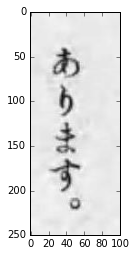

In [10]:
plt.imshow(np.array(bubun))

In [11]:
page_obj.getBinarized()
bi_bubun = page_obj.binarized[80:330, 1030:1130]

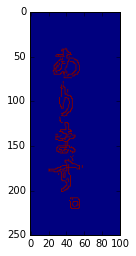

In [12]:
plt.imshow(np.array(bi_bubun))

In [13]:
w, h, c = page_obj.img.shape

In [14]:
print("width : {0}, height : {1}, channel : {2}".format(w, h, c))

width : 1685, height : 1164, channel : 3


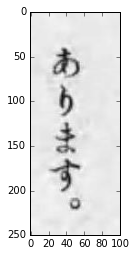

In [15]:
kusen = page_obj.img[80:330, 1030:1130]
plt.imshow(np.array(kusen))

In [17]:
print(kusen.dtype)
print(kusen.shape)

uint8
(250, 100, 3)


uint8
(250, 100)


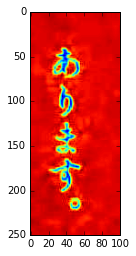

In [20]:
import  cv2
kusen_gray = cv2.cvtColor(kusen, cv2.COLOR_BGR2GRAY)
print(kusen_gray.dtype)
print(kusen_gray.shape)
plt.imshow(kusen_gray)

uint8
(250, 100)


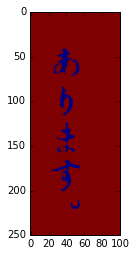

In [42]:
ret, kusen_thresh = cv2.threshold(kusen_gray, 127, 255, 0)
plt.imshow(kusen_thresh)
print(kusen_thresh.dtype)
print(kusen_thresh.shape)

1
uint8
(250, 100)


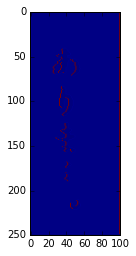

In [65]:
print(cv2.RETR_LIST)
im2, contours, hierarchy = cv2.findContours(kusen_thresh, cv2.RETR_LIST, 2)
plt.imshow(im2)
print(im2.dtype)
print(im2.shape)

In [37]:
print(len(hierarchy))
print(hierarchy[0])

1
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [ 8  6 -1 -1]
 [-1  7 -1 -1]]


In [66]:
print(len(contours))

10


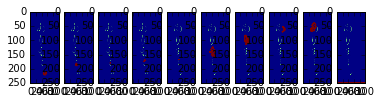

In [67]:
imgs = []
for i in range(0, len(contours)):
    imgs.append(im2.copy())
    cv2.drawContours(imgs[i], contours, i, (255, 255, 255), 3)
    plt.subplot(1,len(contours),i+1)
    plt.imshow(imgs[i])

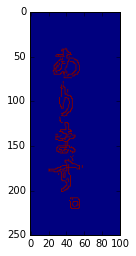

In [51]:
bi_kusen = page_obj.binarized[80:330, 1030:1130]
plt.imshow(np.array(bi_kusen))

In [56]:
import cv2

In [58]:
contours = cv2.findContours(bi_kusen, 1, 2)

In [67]:
cnt = contours[0]
print(len(cnt))

250


In [68]:
M = cv2.moments(cnt)

In [69]:
print(M)

{'m02': 1206387650.0, 'mu12': 238332360.22162342, 'm01': 8174324.0, 'mu21': -3235556.78784132, 'm03': 197268869294.0, 'm11': 333807284.0, 'm21': 14012176168.0, 'nu11': 0.001234765177673678, 'nu02': 0.04220636881667686, 'm10': 2612589.0, 'm20': 108100729.0, 'nu12': 0.00022131790676597717, 'm12': 50044707154.0, 'nu21': -3.004571661362336e-06, 'nu03': 0.0006429229889167123, 'mu30': 3832166.226869583, 'mu20': 3079860.8615697026, 'mu11': 5215759.2998631, 'mu02': 178283502.52294862, 'nu30': 3.558589387196024e-06, 'm30': 4596874443.0, 'mu03': 692349551.0523071, 'm00': 64993.0, 'nu20': 0.0007291181830507663}


In [70]:
print(M['m00'])

64993.0


In [72]:
area = cv2.contourArea(cnt)
print(area)

error: D:\Build\OpenCV\opencv-3.1.0\modules\imgproc\src\shapedescr.cpp:314: error: (-215) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function cv::contourArea


In [74]:
print(len(cnt[0]))

100
